<a href="https://colab.research.google.com/github/HChandeepa/Lung_Sound_Classification_System/blob/Master/Audio_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# List of folder paths
folder_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiectasis',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiolitis',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchitis',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/COPD',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Healthy',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Lung Fibrosis',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Plueral Effusion',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Pneumonia',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/URTI'
]

# Loop through each folder path and calculate the number of .wav files
for folder_path in folder_paths:
    # List all .wav files in the folder
    wav_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

    # Count the number of .wav files
    num_wav_files = len(wav_files)

    # Print the result
    print(f'Number of .wav files in the folder {os.path.basename(folder_path)}: {num_wav_files}')


Number of .wav files in the folder Asthma: 414
Number of .wav files in the folder Bronchiectasis: 64
Number of .wav files in the folder Bronchiolitis: 52
Number of .wav files in the folder Bronchitis: 24
Number of .wav files in the folder COPD: 3471
Number of .wav files in the folder Healthy: 422
Number of .wav files in the folder Lung Fibrosis: 41
Number of .wav files in the folder Plueral Effusion: 27
Number of .wav files in the folder Pneumonia: 192
Number of .wav files in the folder URTI: 92


In [ ]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
audio_file  = '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Plueral Effusion/BP6_Plueral Effusion,I C B,P L R,81,M_segment_0.wav'

In [ ]:
y, sr = librosa.load(audio_file)

In [ ]:
#Apply a pitch shift of 1 seminote
n_steps = 1
y_shifted = librosa.effects.pitch_shift(y, sr = sr, n_steps=n_steps)

In [ ]:
sf.write('BP6_Plueral Effusion,I C B,P L R,81,M_segment_0_0.wav', y_shifted, sr)

In [ ]:
import librosa.display

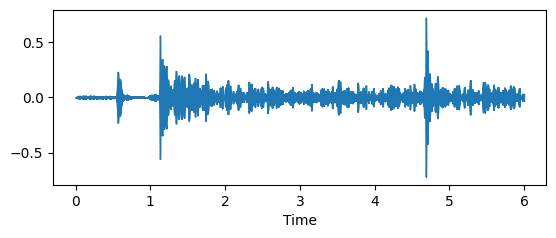

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(2, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.show()

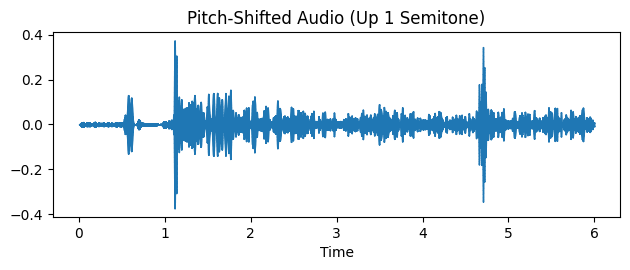

In [ ]:
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_shifted, sr=sr)
plt.title('Pitch-Shifted Audio (Up 1 Semitone)')

plt.tight_layout()
plt.show()

In [ ]:
import librosa
import os
import random
import soundfile as sf

In [ ]:
def pitch_shift(audio_file, output_file, sr=22050, n_steps=1):
  y, sr = librosa.load(audio_file,sr=sr)
  y_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)
  sf.write(output_file, y_shifted, sr)  # Use soundfile to write the audio file

def augment_samples(directory,target_count):
  files = os.listdir(directory)
  current_count = len(files)

  while current_count < target_count:
    files_to_augment = random.choice(files)
    base_name, ext = os.path.splitext(files_to_augment)
    augmented_file = os.path.join(directory, f"{base_name}_aug{current_count}{ext}")

    pitch_shift(os.path.join(directory, files_to_augment), augmented_file)

    current_count+=1


In [ ]:
augment_samples('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiectasis', 120)

In [ ]:
augment_samples('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiolitis', 150)

In [ ]:
augment_samples('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/URTI', 184)

In [ ]:
augment_samples('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Plueral Effusion', 120)

In [ ]:
augment_samples('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Lung Fibrosis', 115)

In [ ]:
augment_samples('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchitis', 110)

In [ ]:
augment_samples('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Healthy', 1000)

In [ ]:
import os
import random
import shutil

def reduce_samples(directory, target_count):
    files = os.listdir(directory)
    current_count = len(files)

    if current_count > target_count:
        files_to_remove = random.sample(files, current_count - target_count)
        for file in files_to_remove:
            os.remove(os.path.join(directory, file))
        print(f"Reduced {directory} from {current_count} to {target_count} files.")
    else:
        print(f"No reduction needed for {directory}. Current count is {current_count}.")


In [ ]:
# Example Usage:
reduce_samples('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma', 111)

Reduced /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma from 414 to 111 files.


In [ ]:
reduce_samples('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/COPD', 115)

Reduced /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/COPD from 3471 to 115 files.


In [ ]:
reduce_samples('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Pneumonia', 150)

Reduced /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Pneumonia from 192 to 150 files.


In [ ]:
reduce_samples('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/URTI', 110)

Reduced /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/URTI from 184 to 110 files.


In [27]:
import librosa
import os
import random
import soundfile as sf

def pitch_shift(audio_file, output_file, sr=22050, n_steps=1):
    y, sr = librosa.load(audio_file, sr=sr)
    y_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)
    sf.write(output_file, y_shifted, sr)

def augment_samples(directory, target_count):
    files = os.listdir(directory)
    current_count = len(files)

    # If the current number of files is already at or above the target, exit
    if current_count >= target_count:
        print(f"Directory already contains {current_count} files, no augmentation needed.")
        return

    while current_count < target_count:
        file_to_augment = random.choice(files)  # Choose a random file from the directory
        base_name, ext = os.path.splitext(file_to_augment)
        augmented_file = os.path.join(directory, f"{base_name}_aug{current_count}{ext}")

        pitch_shift(os.path.join(directory, file_to_augment), augmented_file)

        current_count += 1  # Increment the count after saving the augmented file
        files.append(os.path.basename(augmented_file))  # Update the list of files to include new augmented file

# Example Usage: Increase to 1175 files
augment_samples('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Healthy', 1175)


In [28]:
import os

# List of folder paths
folder_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiectasis',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiolitis',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchitis',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/COPD',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Healthy',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Lung Fibrosis',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Plueral Effusion',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Pneumonia',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/URTI'
]

# Loop through each folder path and calculate the number of .wav files
for folder_path in folder_paths:
    # List all .wav files in the folder
    wav_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

    # Count the number of .wav files
    num_wav_files = len(wav_files)

    # Print the result
    print(f'Number of .wav files in the folder {os.path.basename(folder_path)}: {num_wav_files}')


Number of .wav files in the folder Asthma: 111
Number of .wav files in the folder Bronchiectasis: 120
Number of .wav files in the folder Bronchiolitis: 150
Number of .wav files in the folder Bronchitis: 110
Number of .wav files in the folder COPD: 115
Number of .wav files in the folder Healthy: 1175
Number of .wav files in the folder Lung Fibrosis: 115
Number of .wav files in the folder Plueral Effusion: 120
Number of .wav files in the folder Pneumonia: 150
Number of .wav files in the folder URTI: 110
